### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Feb 12 04:30:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.86.16              Driver Version: 572.16         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A5000               On  |   00000000:15:00.0 Off |                  Off |
| 30%   45C    P8             26W /  230W |     982MiB /  24564MiB |      7%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/project


## Install YOLO11 via Ultralytics

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.74 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX A5000, 24564MiB)
Setup complete ✅ (48 CPUs, 377.1 GB RAM, 437.8/1006.9 GB disk)


**NOTE:** When training YOLO11, make sure your data is located in `{HOME}/datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. When downloading data from [Roboflow Universe](https://universe.roboflow.com/), use the YOLOv8 format.

In [4]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

/project/datasets


/home/ubuntu/.local/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
!pip install roboflow --quiet

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/looseversion-1.3.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_utilities-0.11.8-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/opt_einsum-3.4.0-py3.12.egg is deprecated. pip 25.1 will enforce 

In [1]:
import roboflow
rf = roboflow.Roboflow(api_key="NqjtCN1BkDxTg2u1jXzs")
project = rf.workspace("dotdetection").project("pointkneedetectionv5")
dataset = project.version(16).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PointKneeDetectionV5-16 in yolov8:: 100%|██████████| 146/146 [00:00<00:00, 6611.48it/s]


**NOTE:** Make sure to run commands below to make dataset work with YOLO11 training.

In [2]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

## Custom Training

In [3]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n-pose.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

[Errno 2] No such file or directory: '{HOME}'
/project


This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.


WARNING ⚠️ conflicting 'task=detect' passed with 'task=pose' model. Ignoring 'task=detect' and updating to 'task=pose' to match model.
Ultralytics 8.3.74 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX A5000, 24564MiB)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=/project/PointKneeDetectionV5-16/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=N

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [11]:
!ls {HOME}/runs/pose/train/

BoxF1_curve.png
BoxPR_curve.png
BoxP_curve.png
BoxR_curve.png
PoseF1_curve.png
PosePR_curve.png
PoseP_curve.png
PoseR_curve.png
args.yaml
confusion_matrix.png
confusion_matrix_normalized.png
events.out.tfevents.1739335153.project-aiworkbench-ultralytics.1583.0
labels.jpg
labels_correlogram.jpg
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
weights


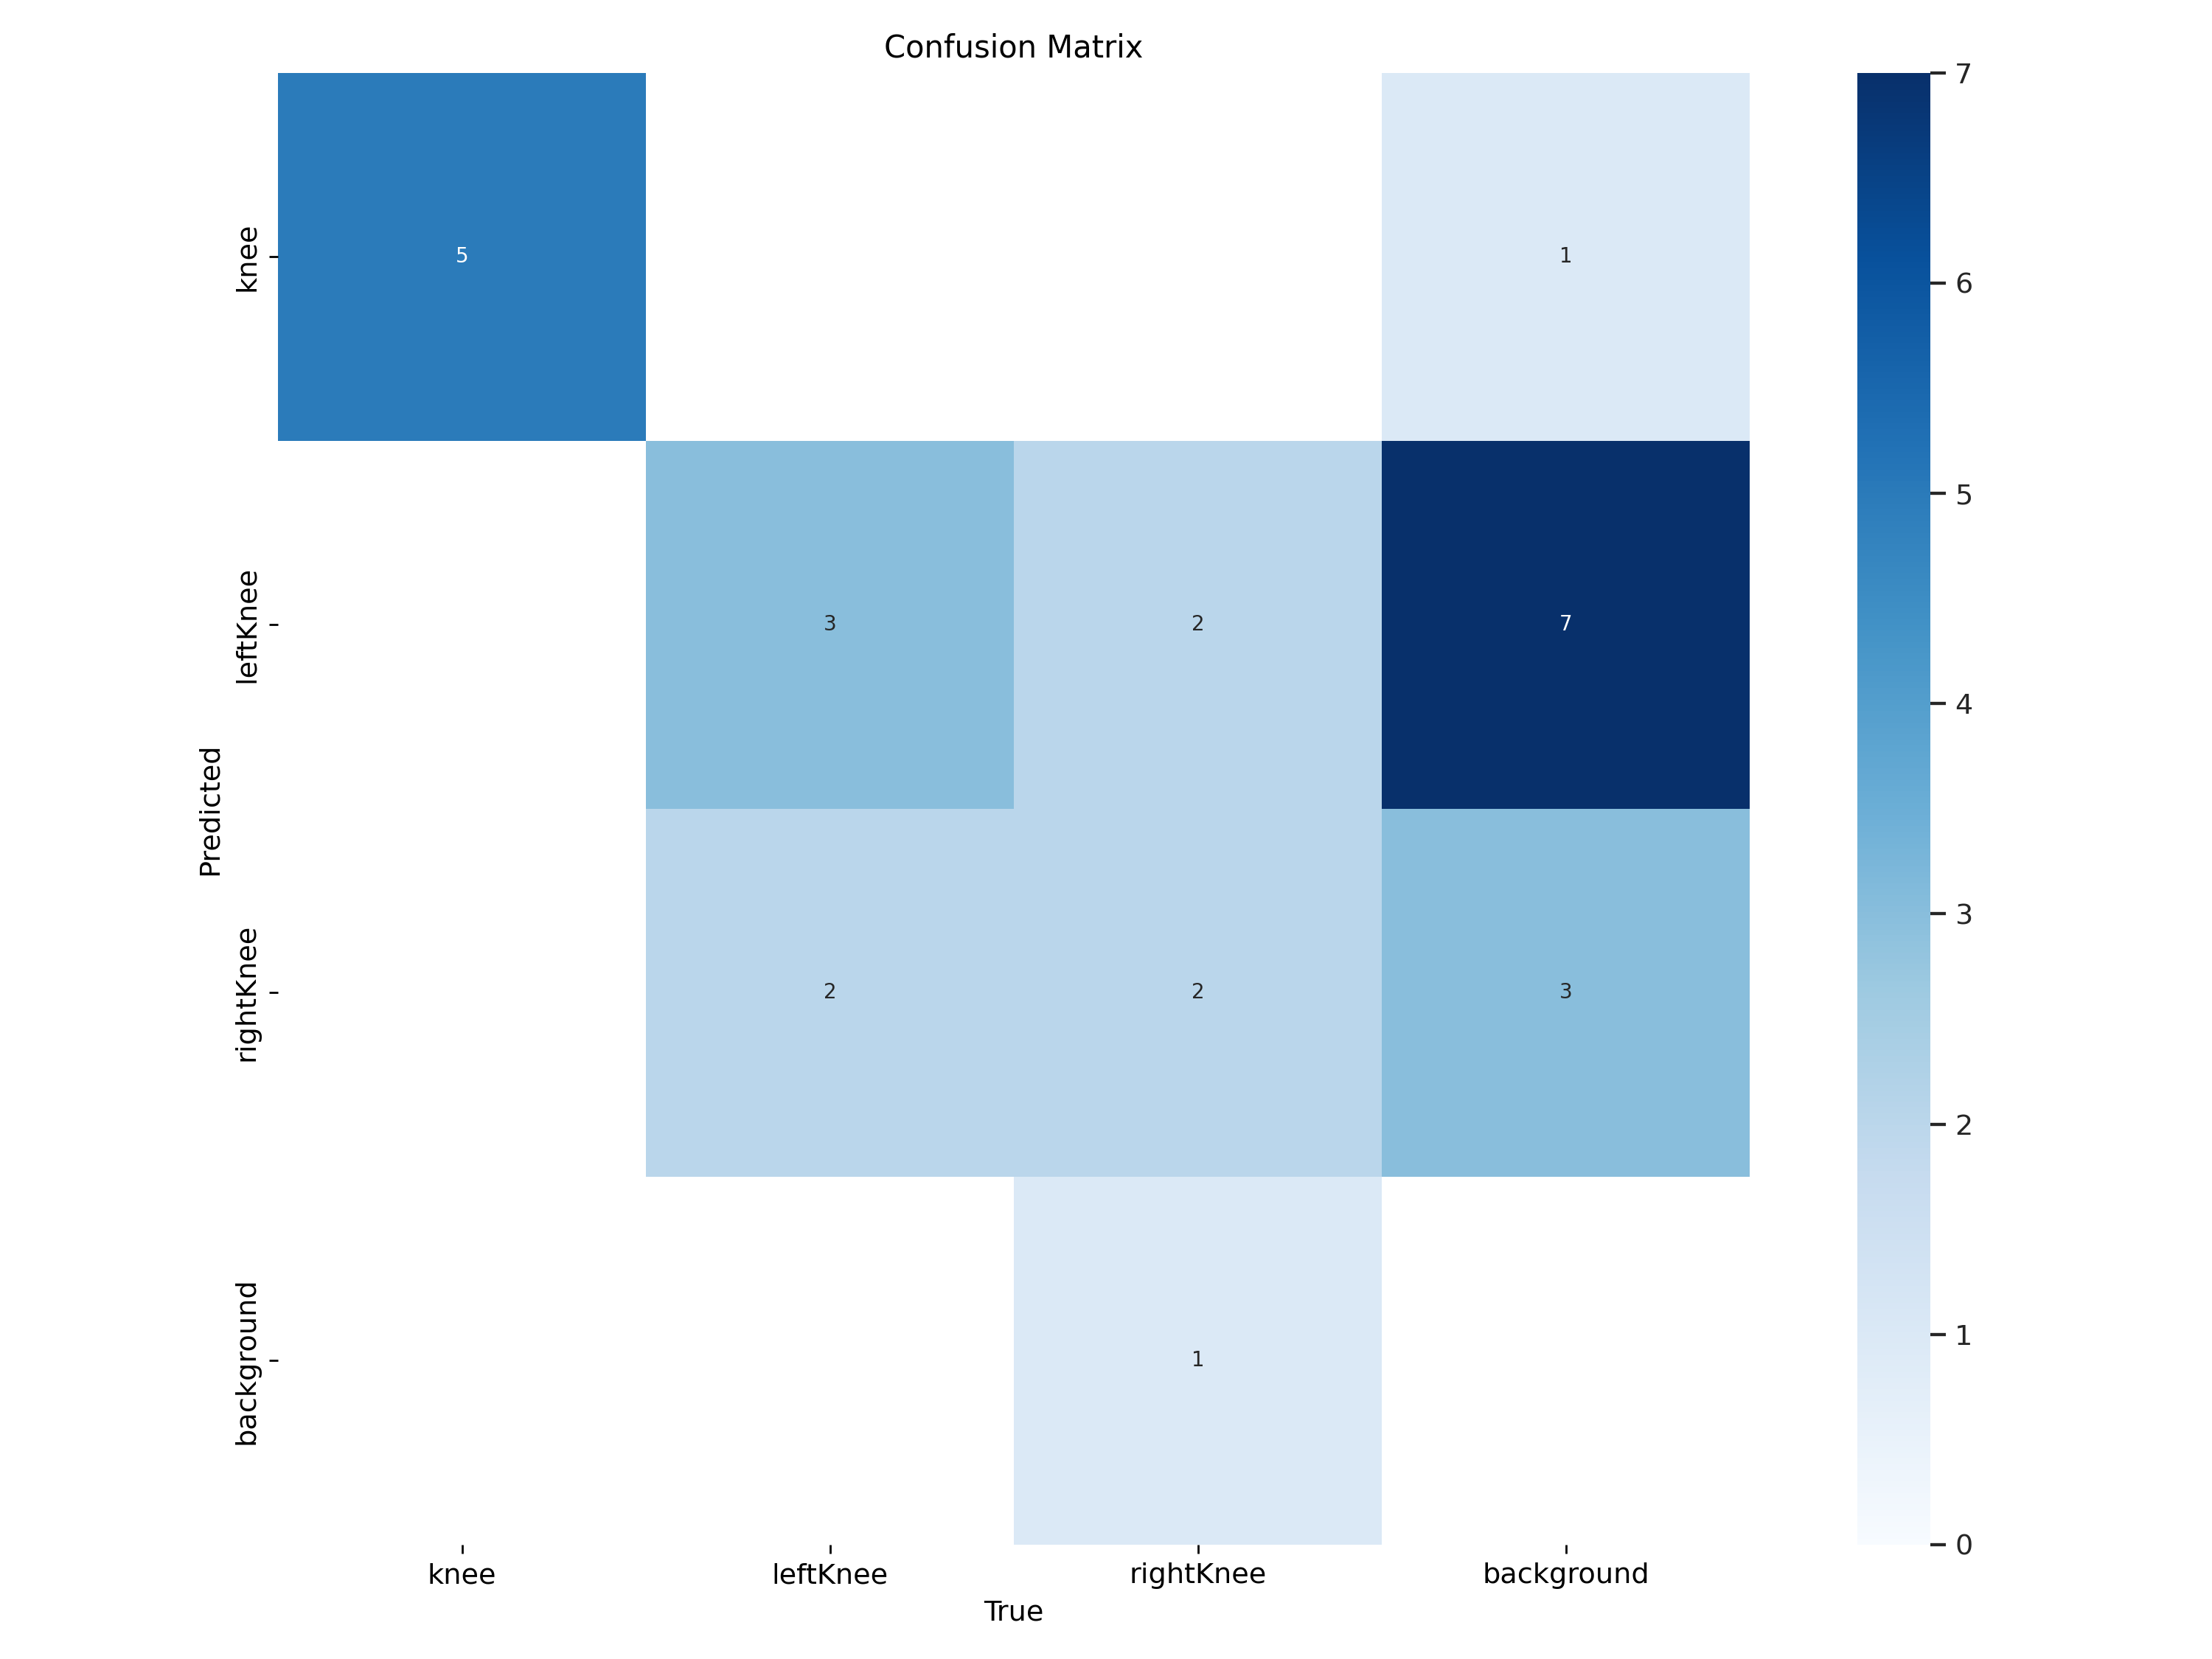

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/pose/train/confusion_matrix.png', width=600)

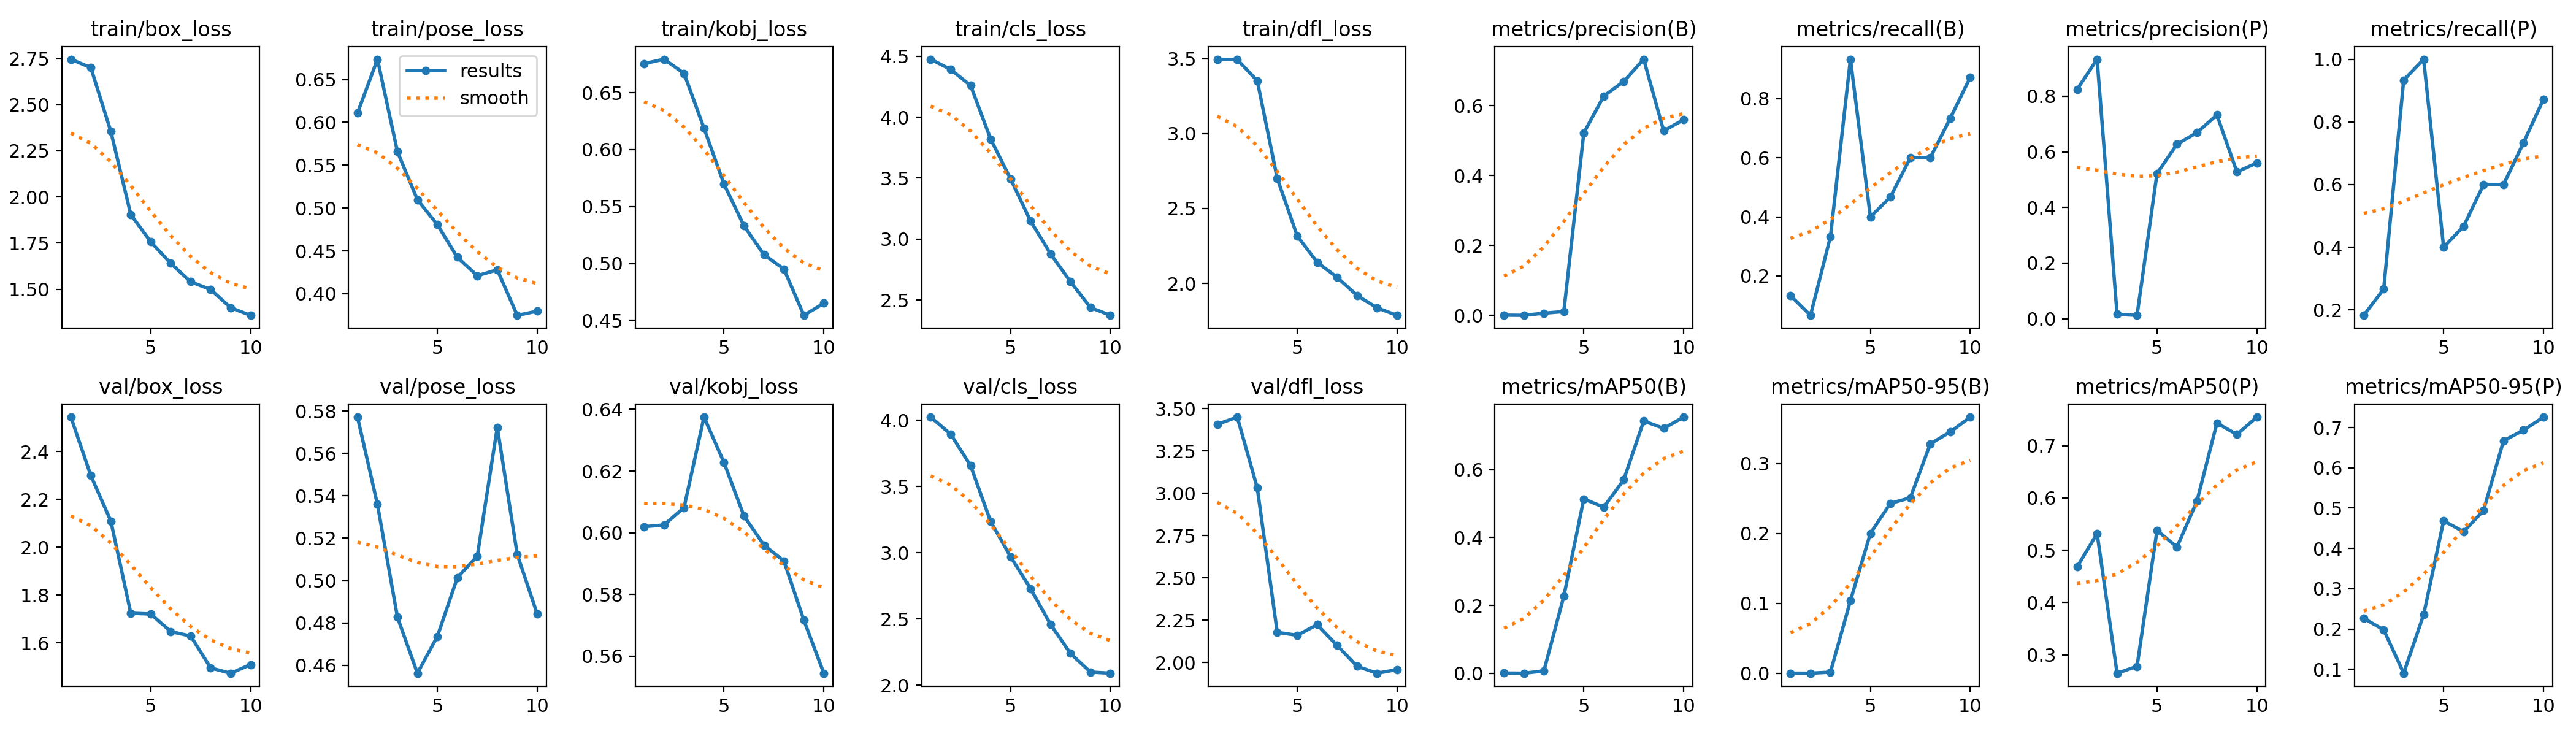

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/pose/train/results.png', width=600)

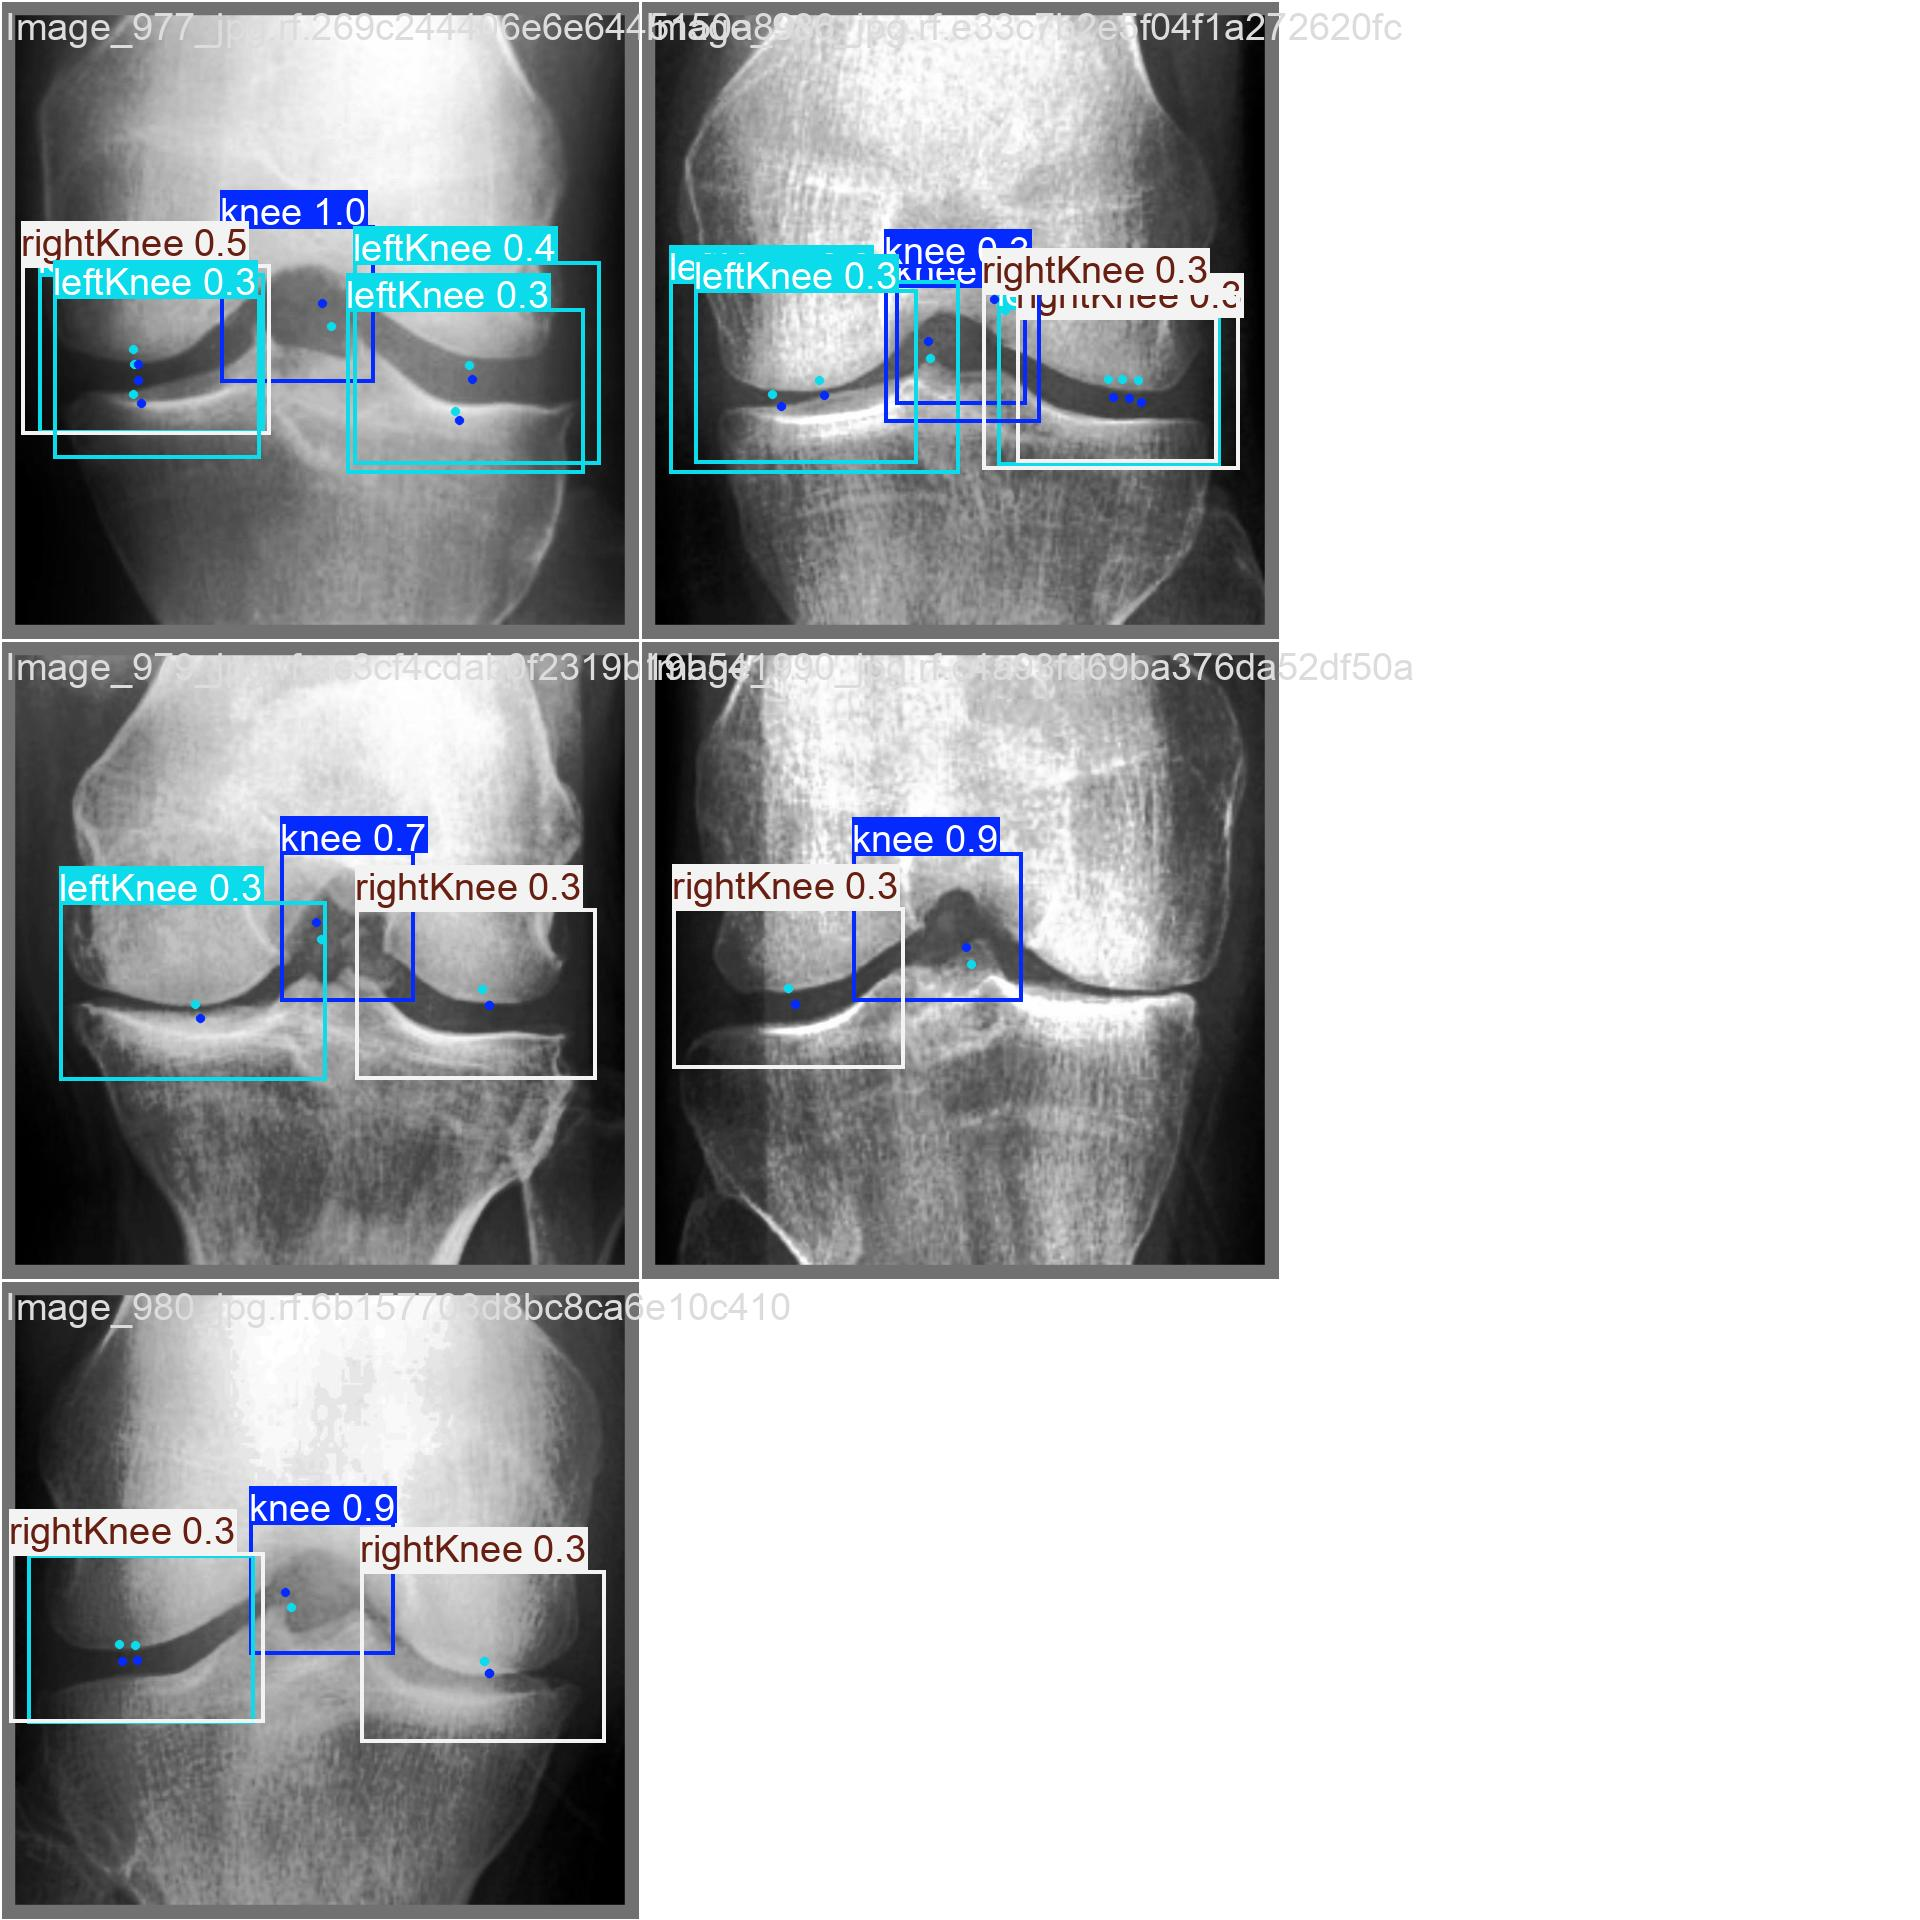

In [14]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/pose/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [15]:
!yolo task=detect mode=val model={HOME}/runs/pose/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=pose' model. Ignoring 'task=detect' and updating to 'task=pose' to match model.
Ultralytics 8.3.74 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX A5000, 24564MiB)
YOLO11n-pose summary (fused): 257 layers, 2,654,563 parameters, 0 gradients, 6.6 GFLOPs
val: Scanning /project/datasets/PointKneeDetectionV5-16/valid/labels.cache... 5 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          5         15       0.56      0.872      0.753      0.368       0.56      0.872      0.753      0.725
                  knee          5          5      0.825          1      0.995      0.517      0.825          1      0.995      0.915
              leftKnee          5          5      0.421          1      0.745      0.327      0.421          1      0.745      0.745
             rightKnee          5          5      0.435      0.617       0.52      0.261      0.435      0.617       0.52      

## Inference with custom model

In [16]:
!yolo task=detect mode=predict model={HOME}/runs/pose/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=pose' model. Ignoring 'task=detect' and updating to 'task=pose' to match model.
Ultralytics 8.3.74 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX A5000, 24564MiB)
YOLO11n-pose summary (fused): 257 layers, 2,654,563 parameters, 0 gradients, 6.6 GFLOPs

image 1/3 /project/datasets/PointKneeDetectionV5-16/test/images/Image_976_jpg.rf.bec9324ec7c452d6eec4edd376c0cc09.jpg: 640x640 1 knee, 3 leftKnees, 17.6ms
image 2/3 /project/datasets/PointKneeDetectionV5-16/test/images/Image_987_jpg.rf.108d1da9850f381362c2209fa5703e99.jpg: 640x640 1 knee, 3 leftKnees, 17.6ms
image 3/3 /project/datasets/PointKneeDetectionV5-16/test/images/Image_995_jpg.rf.81080a8e19d0353984fa6bf6242e4ebc.jpg: 640x640 1 knee, 3 leftKnees, 16.0ms
Speed: 3.6ms preprocess, 17.1ms inference, 68.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/pose/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Let's take a look at few results.

In [21]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder =glob.glob('/runs/pose/predict/')
latest_folder

[]

In [ ]:
for img in glob.glob(f'{latest_folder}/*.jpg')[:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")